In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt


from sklearn.linear_model import Lasso

user_ratingRMSE=[]
total_starsRMSE=[]
user_ratingR2=[]
total_starsR2=[]

In [67]:
dataframe = pd.read_csv("../Preprocessing/preprocessdffixed.csv")

In [68]:
dataframe = dataframe.drop(['Unnamed: 0' ], axis=1)
dataframe

,User Rating,Review,Price,Year,Genre,Occurences,Total Stars,000,10,100,...,write,year,york,young,zelda,zhi,zinczenko,zone,zoo,zusak
0,0.8750,0.197178,0.067308,0.7,1.0,0.000000,0.193075,0.0,0.914439,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.8125,0.022949,0.201923,0.2,0.0,0.000000,0.021992,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.8750,0.215730,0.134615,0.9,1.0,0.000000,0.211241,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8750,0.243577,0.048077,0.8,0.0,0.000000,0.238507,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9375,0.086875,0.105769,1.0,1.0,0.000000,0.086891,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.7500,0.122124,0.134615,0.3,0.0,0.000000,0.114481,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,0.5625,0.014407,0.096154,0.1,1.0,0.000000,0.012571,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,0.9375,0.245866,0.076923,0.4,0.0,0.444444,0.245879,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,1.0000,0.106783,0.067308,1.0,0.0,0.000000,0.109032,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
dataframe.info()
X_to_split = dataframe.drop('User Rating', axis=1).values
y_to_split = dataframe['User Rating']
y_to_split

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Columns: 1391 entries, User Rating to zusak
dtypes: float64(1391)
memory usage: 3.7 MB


0      0.8750
1      0.8125
2      0.8750
3      0.8750
4      0.9375
        ...  
342    0.7500
343    0.5625
344    0.9375
345    1.0000
346    0.8750
Name: User Rating, Length: 347, dtype: float64

In [70]:
X_train, X_test, y_train, y_test \
    = train_test_split(X_to_split, y_to_split)


In [71]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predict_train = LR.predict(X_train)
print('Results for User Rating target')

print('RMSE on the training set: ', np.sqrt(MSE(y_predict_train, y_train)))
print('R^2 score on training set: ', LR.score(X_train,y_train))

y_test_predict = LR.predict(X_test)
y_test_predict
print('RMSE on the test set: ', np.sqrt(MSE(y_test_predict, y_test)))
print('R^2 score on test set: ', LR.score(X_test,y_test))

user_ratingRMSE.append(np.sqrt(MSE(y_test_predict, y_test)))             
user_ratingR2.append(LR.score(X_test,y_test))



Results for User Rating target
RMSE on the training set:  6.309740391678008e-16
R^2 score on training set:  1.0
RMSE on the test set:  0.11972828191974981
R^2 score on test set:  0.05561862311373267


In [72]:
#Lasso Regression

las = Lasso(alpha=.001)
las.fit(X_train, y_train)

y_predict_train = las.predict(X_train)
print('Results for User Rating target')

print('RMSE on the training set: ', np.sqrt(MSE(y_predict_train, y_train)))
print('R^2 score on training set: ', las.score(X_train,y_train))

y_test_predict = las.predict(X_test)
y_test_predict
print('RMSE on the test set: ', np.sqrt(MSE(y_test_predict, y_test)))
print('R^2 score on test set: ', las.score(X_test,y_test))

user_ratingRMSE.append(np.sqrt(MSE(y_test_predict, y_test)))              
user_ratingR2.append(las.score(X_test,y_test))


Results for User Rating target
RMSE on the training set:  0.10275409629852032
R^2 score on training set:  0.5143331590752129
RMSE on the test set:  0.11715251152876123
R^2 score on test set:  0.0958153701636536


In [73]:
dataframe.info()
X_to_split = dataframe.drop('Total Stars', axis=1).values
y_to_split = dataframe['Total Stars']
y_to_split

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Columns: 1391 entries, User Rating to zusak
dtypes: float64(1391)
memory usage: 3.7 MB


0      0.193075
1      0.021992
2      0.211241
3      0.238507
4      0.086891
         ...   
342    0.114481
343    0.012571
344    0.245879
345    0.109032
346    0.159409
Name: Total Stars, Length: 347, dtype: float64

In [74]:
X_train, X_test, y_train, y_test \
    = train_test_split(X_to_split, y_to_split)


In [75]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predict_train = LR.predict(X_train)
print('Results for Total Stars target')
print('RMSE on the training set: ', np.sqrt(MSE(y_predict_train, y_train)))
print('R^2 score on training set: ', LR.score(X_train,y_train))

y_test_predict = LR.predict(X_test)
y_test_predict
print('RMSE on the test set: ', np.sqrt(MSE(y_test_predict, y_test)))
print('R^2 score on test set: ', LR.score(X_test,y_test))
total_starsRMSE.append(np.sqrt(MSE(y_test_predict, y_test)))
                       
total_starsR2.append(LR.score(X_test,y_test))


Results for Total Stars target
RMSE on the training set:  4.533970327581221e-16
R^2 score on training set:  1.0
RMSE on the test set:  0.059383507310479665
R^2 score on test set:  0.8336769704397591


In [76]:
# Lasso Regression

In [95]:
las = Lasso(alpha=.0001)
las.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [96]:
y_predict_train = las.predict(X_train)
print('Results for Total Stars target')

print('RMSE on the training set: ', np.sqrt(MSE(y_predict_train, y_train)))
print('R^2 score on training set: ', las.score(X_train,y_train))

y_test_predict = las.predict(X_test)
y_test_predict
print('RMSE on the test set: ', np.sqrt(MSE(y_test_predict, y_test)))
print('R^2 score on test set: ', las.score(X_test,y_test))
total_starsRMSE.append(np.sqrt(MSE(y_test_predict, y_test)))
                       
total_starsR2.append(las.score(X_test,y_test))

Results for Total Stars target
RMSE on the training set:  0.006429366004956142
R^2 score on training set:  0.9963148985424308
RMSE on the test set:  0.01015086723471242
R^2 score on test set:  0.9951401037994316


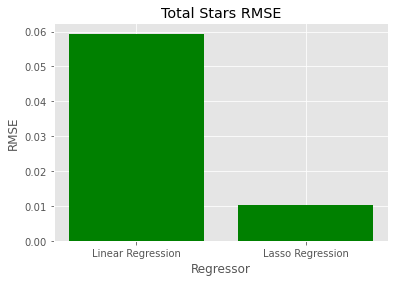

In [79]:

%matplotlib inline
plt.style.use('ggplot')

x = ['Linear Regression', 'Lasso Regression']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, total_starsRMSE, color='green')
plt.xlabel("Regressor")
plt.ylabel("RMSE")
plt.title("Total Stars RMSE")

plt.xticks(x_pos, x)

plt.show()

# note that Lasso has lower RMSE                       


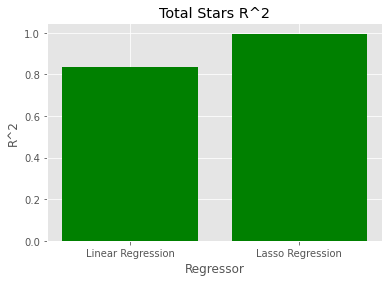

In [80]:

%matplotlib inline
plt.style.use('ggplot')

x = ['Linear Regression', 'Lasso Regression']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, total_starsR2, color='green')
plt.xlabel("Regressor")
plt.ylabel("R^2")
plt.title("Total Stars R^2")

plt.xticks(x_pos, x)

plt.show()

                       
# note that Lasso has higher R^2 score

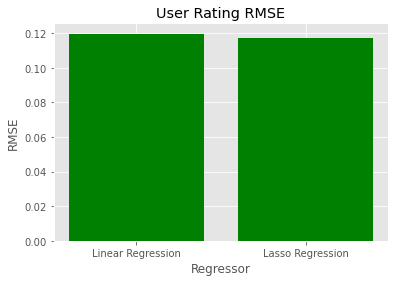

In [81]:

%matplotlib inline
plt.style.use('ggplot')

x = ['Linear Regression', 'Lasso Regression']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, user_ratingRMSE, color='green')
plt.xlabel("Regressor")
plt.ylabel("RMSE")
plt.title("User Rating RMSE")

plt.xticks(x_pos, x)

plt.show()

# note that lasso has a lower RMSE
                       


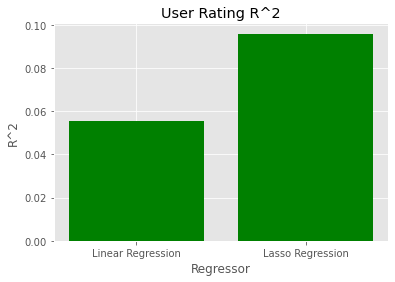

In [82]:

%matplotlib inline
plt.style.use('ggplot')

x = ['Linear Regression', 'Lasso Regression']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, user_ratingR2, color='green')
plt.xlabel("Regressor")
plt.ylabel("R^2")
plt.title("User Rating R^2")
plt.xticks(x_pos, x)

plt.show()

                       
